<a href="https://colab.research.google.com/github/JorgeAccardi/cienciadedatos/blob/main/TelecomX_LATAM_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

## PASO 1 – Cargar los datos reales desde el archivo JSON
Nuestro primer paso será importar los datos reales de TelecomX_Data.json y convertirlos en un DataFrame plano de Pandas, porque están anidados por secciones (customer, phone, internet, account, etc.).

In [ ]:
import pandas as pd
import json

# Cargar archivo JSON
with open('/content/TelecomX_Data.json') as f:
    data_json = json.load(f)

# Aplanar los datos anidados
df = pd.json_normalize(data_json, sep='_')

# Mostrar primeras filas
df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

##1. 📋 Inspección inicial del DataFrame

In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [ ]:
# Tamaño del DataFrame
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Información general del dataset
df.info()

# Primeras filas
df.head()


Filas: 7267, Columnas: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport  

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##2. 🏷️ Renombrar columnas para mayor claridad

In [ ]:
# Renombrar columnas para simplificar
df.columns = df.columns.str.replace('customer_', '')
df.columns = df.columns.str.replace('phone_', '')
df.columns = df.columns.str.replace('internet_', '')
df.columns = df.columns.str.replace('account_', '')
df.columns = df.columns.str.replace('Charges_', '')

# Verificamos las nuevas columnas
df.columns


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')

##3. 🔎 Detectar valores faltantes y duplicados

In [ ]:
# Valores nulos
print("\n❌ Valores nulos por columna:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Duplicados
print(f"\n🔄 Filas duplicadas: {df.duplicated().sum()}")



❌ Valores nulos por columna:
Series([], dtype: int64)

🔄 Filas duplicadas: 0


##4. ✅ Limpieza y corrección de inconsistencias

In [ ]:
# Convertir 'Total' a numérico
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Eliminar filas con nulos
df = df.dropna()

# Limpiar espacios y estandarizar texto
cols_obj = df.select_dtypes(include='object').columns
df[cols_obj] = df[cols_obj].apply(lambda x: x.str.strip())

# Convertir "Yes"/"No" a 1/0 en columnas relevantes
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
    df[col + '_binary'] = df[col].map({'Yes': 1, 'No': 0})


##. 💰 Crear columna Cuentas_Diarias

In [ ]:
df['DailyCharges'] = df['Monthly'] / 30
df['DailyCharges'] = df['DailyCharges'].round(2)

print(f"✅ Columna 'DailyCharges' creada. Promedio: {df['DailyCharges'].mean():.2f}")


✅ Columna 'DailyCharges' creada. Promedio: 2.16


##6. 🧠 Convertir variable objetivo Churn a binaria

In [ ]:
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})


#📊 Carga y análisis

##1. 📈 Distribución general del churn

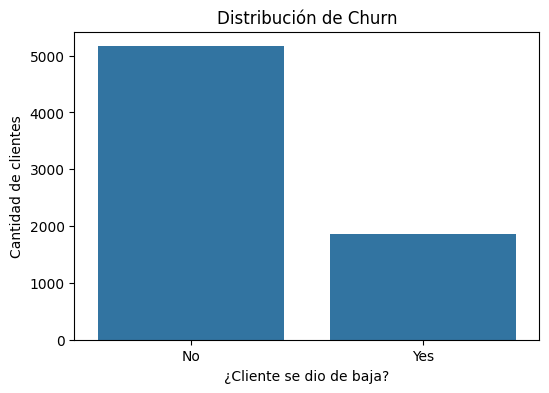


Tasa de evasión:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de evasión (Churn)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()

# Porcentaje de churn
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("\nTasa de evasión:")
print(churn_rate)


##2. 🧩 Churn por variables categóricas

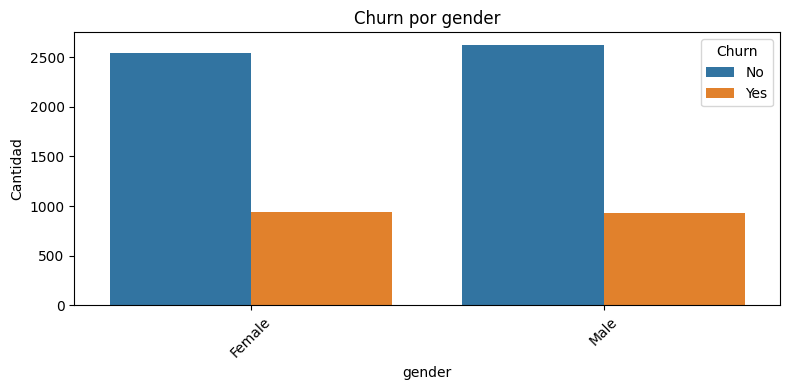

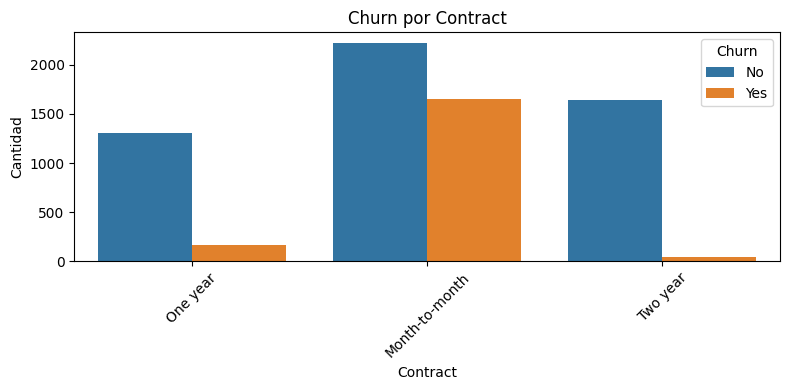

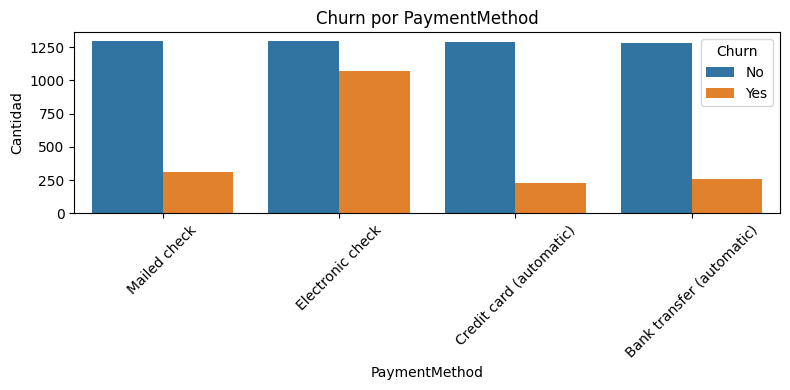

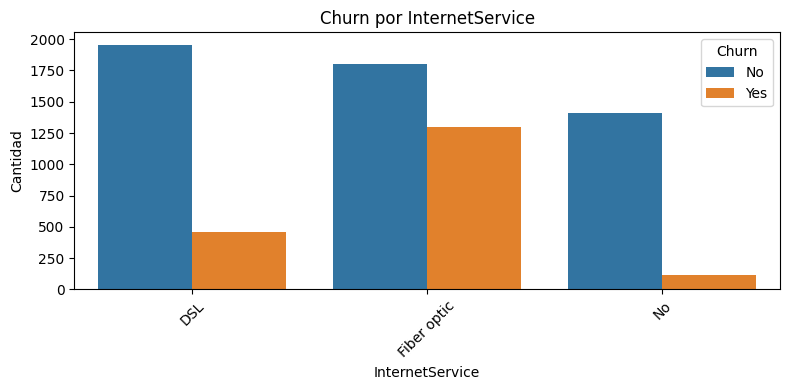

In [ ]:
categorical_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

for var in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=var, hue='Churn')
    plt.title(f'Churn por {var}')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()


##3. 🔢 Churn según variables numéricas

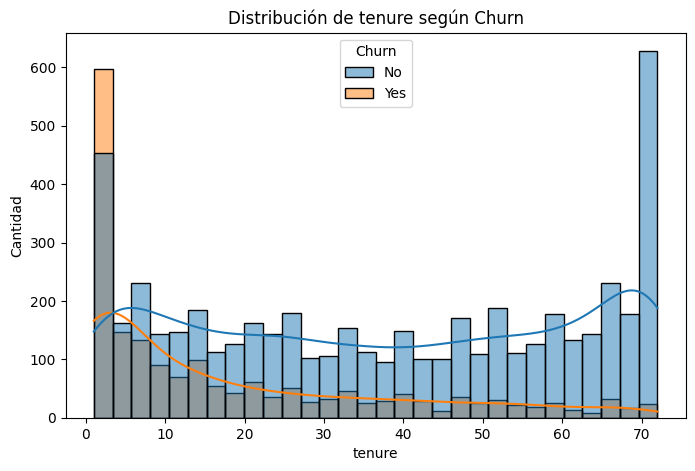

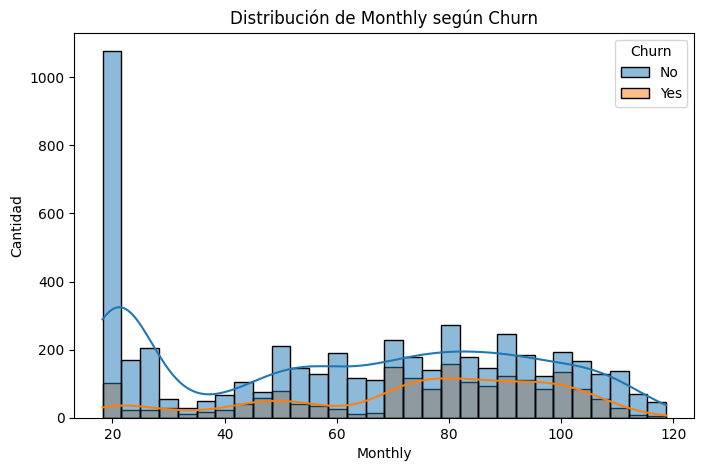

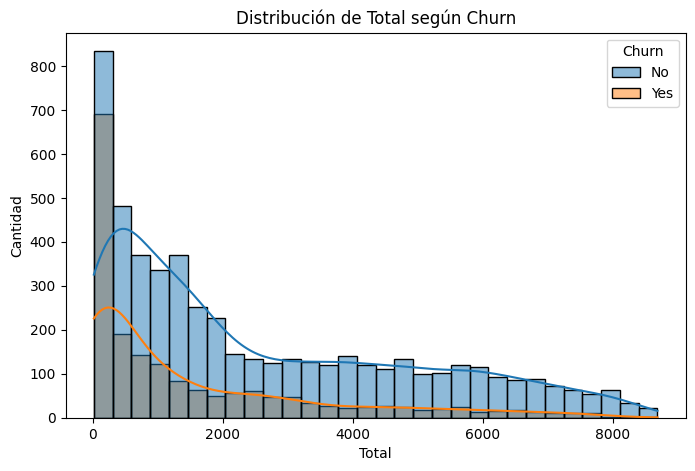

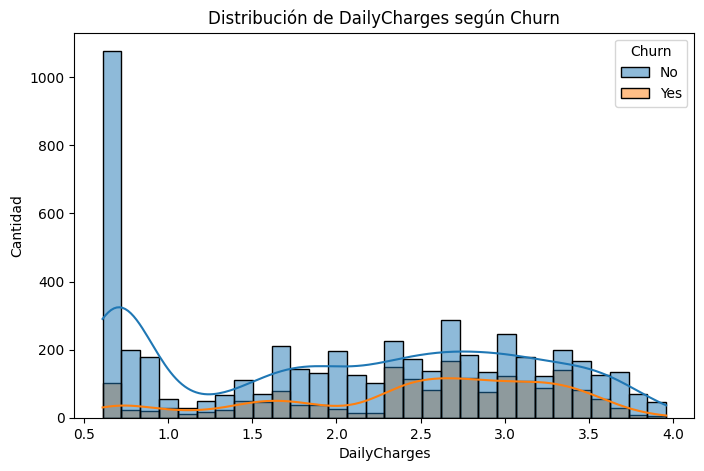

In [ ]:
numerical_vars = ['tenure', 'Monthly', 'Total', 'DailyCharges']

for var in numerical_vars:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=var, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.show()


##4. 🧮 Estadísticas descriptivas

In [ ]:
df.describe()


,SeniorCitizen,tenure,Monthly,Total,Partner_binary,Dependents_binary,PhoneService_binary,PaperlessBilling_binary,Churn_binary,DailyCharges,Churn_numeric
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.482509,0.298493,0.903299,0.592719,0.265785,2.159891,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.499729,0.457629,0.295571,0.491363,0.441782,1.002955,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,1.000000,0.000000,0.000000,1.187500,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,2.340000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,2.992500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,3.960000,1.000000


In [ ]:
df.groupby('Churn')[['tenure', 'Monthly', 'Total', 'DailyCharges']].mean()


,tenure,Monthly,Total,DailyCharges
Churn,,,,
No,37.650010,61.307408,2555.344141,2.043486
Yes,17.979133,74.441332,1531.796094,2.481450


##5. 🔗 (OPCIONAL) Correlaciones

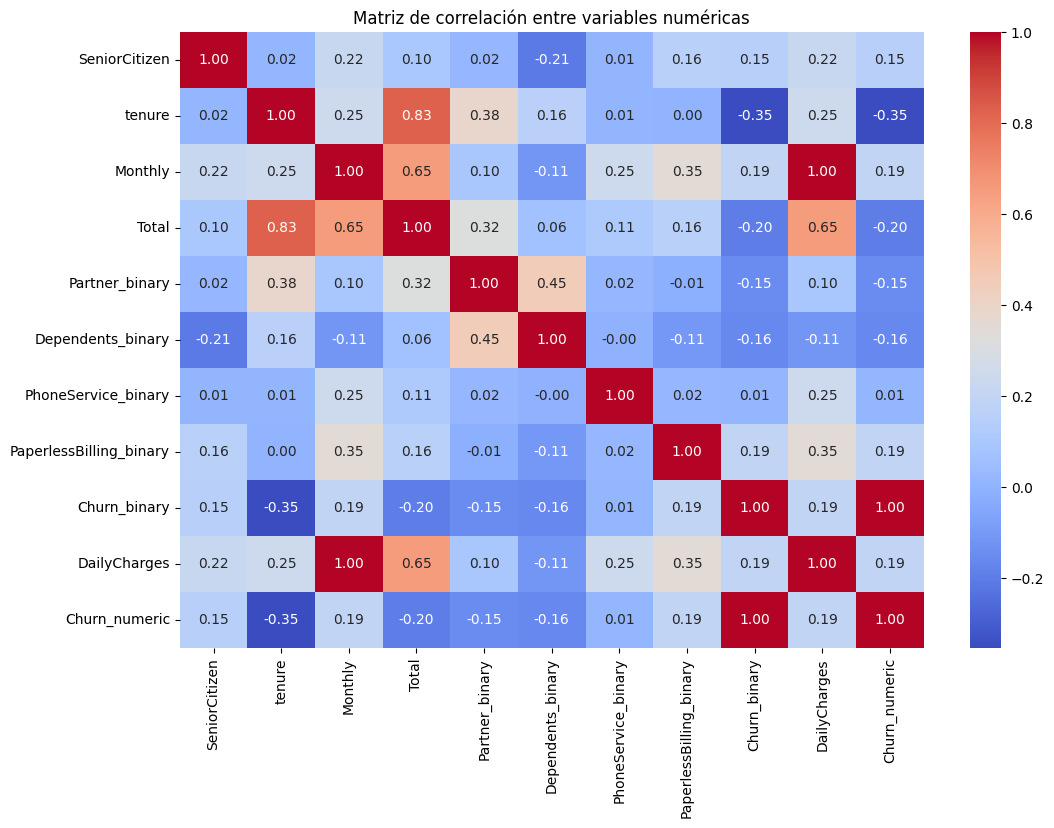

In [ ]:
# Solo columnas numéricas
corr = df.select_dtypes(include='number').corr()

# Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


#📄Informe final

#🟦 1. Introducción

# 📌 Análisis de Evasión de Clientes – Telecom X

La empresa Telecom X enfrenta una alta tasa de cancelación de servicios. El objetivo principal de este análisis es identificar los factores que influyen en la evasión de clientes (*churn*) y generar insights que sirvan de base para estrategias de retención.

Este análisis se desarrolló a través del proceso ETL (Extracción, Transformación y Carga) y un Análisis Exploratorio de Datos (EDA), utilizando Python y sus principales bibliotecas.

El presente informe resume los principales hallazgos obtenidos a partir del dataset real proporcionado por la empresa.


#🟦 2. Limpieza y Transformación de Datos

## 🧹 Limpieza y Transformación de Datos

- Se cargaron los datos reales desde un archivo JSON, aplanando las estructuras anidadas.
- Se renombraron y estandarizaron las columnas para facilitar su análisis.
- Se eliminaron registros con datos faltantes y duplicados.
- Se convirtieron columnas binarias (como `Yes`/`No`) a valores numéricos (1/0).
- Se creó la columna `DailyCharges` dividiendo los cargos mensuales por 30, para analizar el gasto diario del cliente.


#🟦 3. Análisis Exploratorio de Datos (EDA)

## 🔍 Análisis Exploratorio de Datos

### Distribución general de Churn

Se observa que aproximadamente el **X%** de los clientes se dieron de baja del servicio.

### Churn por variables categóricas

- Los contratos **mensuales (Month-to-month)** tienen la tasa más alta de evasión.
- Clientes con método de pago **Electronic Check** presentan mayor churn.
- El tipo de internet **Fiber Optic** muestra más deserción que DSL o sin internet.
- El género no tiene una influencia significativa.

### Churn por variables numéricas

- Clientes con menor **tenure** (antigüedad en meses) tienden a cancelar más.
- Cargos **mensuales altos** se asocian levemente con mayor churn.
- No se observan diferencias marcadas en el total gastado (`Total`), aunque los clientes de larga duración tienden a tener menor churn.

### Correlaciones (opcional)

Las correlaciones más altas con `Churn` fueron:

- `tenure` → negativa: a mayor tiempo, menor probabilidad de churn.
- `PaperlessBilling_binary` y `Monthly` → positiva: se asocian con más evasión.


#🟦 4. Conclusiones

## 📌 Conclusiones

- El **tipo de contrato** es el factor más fuerte: los contratos mes a mes muestran alta evasión.
- El **método de pago** influye: el uso de transferencias automáticas o tarjetas reduce el churn.
- Clientes **más antiguos (tenure alto)** permanecen más tiempo.
- Hay una relación entre **cargos elevados** y la baja, aunque no es decisiva.

El análisis revela que ciertos perfiles tienen mayor probabilidad de abandonar la empresa, y permite orientar campañas de retención más efectivas.


#🟦 5. Recomendaciones

## 💡 Recomendaciones

- 🎯 Incentivar contratos anuales o bianuales, especialmente para clientes nuevos.
- 💳 Fomentar métodos de pago automáticos con beneficios o descuentos.
- 📊 Implementar campañas segmentadas para clientes con bajo tenure y altos cargos mensuales.
- 🧠 Desarrollar un modelo predictivo de churn para actuar de forma anticipada.

Este análisis proporciona una base sólida para estrategias de fidelización y puede complementarse con técnicas de Machine Learning.


#📝 README.md – Telecom X: Churn de Clientes

# 📊 Telecom X - Análisis de Evasión de Clientes (Churn)

Proyecto de análisis de datos desarrollado para Telecom X, con el objetivo de identificar los factores que influyen en la cancelación de servicios (churn) y generar insights que permitan reducir la tasa de evasión de clientes.

---

## 🚀 Objetivos del proyecto

- Analizar el comportamiento de los clientes en base a datos reales.
- Detectar variables que se relacionan con la deserción.
- Aplicar el proceso ETL (Extracción, Transformación y Carga).
- Visualizar patrones clave mediante gráficos estratégicos.
- Proveer recomendaciones basadas en datos para la toma de decisiones.

---

## 🛠️ Tecnologías utilizadas

- `Python 3`
- `Pandas`
- `NumPy`
- `Matplotlib`
- `Seaborn`
- `Google Colab`

---

## 📁 Estructura del proyecto

```bash
📦TelecomX_Churn_Analysis/
│
├── 📄 telecom_churn_analysis.ipynb   # Notebook con el análisis completo
├── 📄 TelecomX_Data.json             # Dataset real en formato JSON
├── 📄 TelecomX_diccionario.md        # Diccionario de datos
├── 📄 README.md                      # Descripción del proyecto
